- https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page  
- 2020.01 데이터 다운하기  

In [1]:
from pyspark import SparkConf, SparkContext
import pandas as pd

In [2]:
conf = SparkConf().setMaster("local").setAppName('taxi_trips')
sc = SparkContext(conf=conf)



23/01/14 17:33:56 WARN Utils: Your hostname, MacBook-Pro-2.local resolves to a loopback address: 127.0.0.1; using 192.168.0.21 instead (on interface en0)
23/01/14 17:33:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/14 17:33:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [21]:
tmp = pd.read_parquet('./data/fhvhv_tripdata_2020-01.parquet')
tmp.head()



,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02864,B02864,2020-01-01 00:40:13,2020-01-01 00:43:34,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,...,2.70,2.75,NaN,0.0,18.25,N,N,,N,N
1,HV0003,B02682,B02682,2020-01-01 00:42:31,2020-01-01 00:46:33,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,0.81,...,1.31,2.75,NaN,0.0,10.84,N,N,,N,N
2,HV0003,B02764,B02764,2020-01-01 00:01:42,2020-01-01 00:02:06,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,2.53,...,1.39,2.75,NaN,3.0,11.73,N,N,,N,N
3,HV0003,B02764,B02764,2020-01-01 00:21:23,2020-01-01 00:26:02,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,1.11,...,0.75,2.75,NaN,0.0,5.84,N,N,,N,N
4,HV0003,B02764,B02764,2020-01-01 00:32:20,2020-01-01 00:37:06,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,1.10,...,1.03,2.75,NaN,0.0,7.69,N,N,,N,N


In [4]:
tmp.to_csv('./data/fhvhv_tripdata_2020-01.csv')

In [7]:

#파일 경로
dir_nm = './data/'
file_nm = 'fhvhv_tripdata_2020-01.csv'

#데이터 파싱
lines = sc.textFile(dir_nm+file_nm)
header = lines.first()


In [15]:
lines.first()

',hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag'

In [16]:
filtered_lines = lines.filter(lambda row:row != header)

In [22]:
dates = filtered_lines.map(lambda x: x.split(",")[6].split(" ")[0])
result = dates.countByValue()

In [30]:
result

defaultdict(int,
            {'2020-01-01': 704847,
             '2020-01-02': 499914,
             '2020-01-03': 594923,
             '2020-01-04': 657993,
             '2020-01-05': 600651,
             '2020-01-06': 547729,
             '2020-01-07': 552239,
             '2020-01-08': 596476,
             '2020-01-09': 647768,
             '2020-01-10': 695900,
             '2020-01-11': 771581,
             '2020-01-12': 672746,
             '2020-01-13': 600215,
             '2020-01-14': 603589,
             '2020-01-15': 600818,
             '2020-01-16': 669076,
             '2020-01-17': 798340,
             '2020-01-18': 808727,
             '2020-01-19': 715584,
             '2020-01-20': 592057,
             '2020-01-21': 635964,
             '2020-01-22': 642397,
             '2020-01-23': 670077,
             '2020-01-24': 756598,
             '2020-01-25': 887656,
             '2020-01-26': 706955,
             '2020-01-27': 593268,
             '2020-01-28': 610733,
   

In [26]:
!pip install matplot

  Using cached matplot-0.1.9-py2.py3-none-any.whl (5.0 kB)
  Using cached pyloco-0.0.139-py2.py3-none-any.whl (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 7.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.3 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.0/244.0 kB 5.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached typing-3.7.4.3.tar.gz (78 kB)
  Preparing metadata (setup.py) ... done
  Using cached ushlex-0.99.1.tar.gz (4.7 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.7 MB/s eta 0:00:00
  Created whee

<AxesSubplot: >

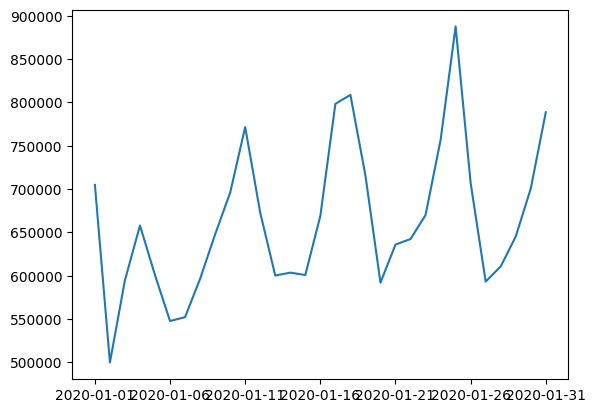

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.Series(result,name='trips').plot()

rdd  
resilient distributed datasets (탄력적 분산 데이터 세트)  
rdd.map(<task>)  
